In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_excel("TemizYıllıkVeri.xlsx")
df.tail()

,Unnamed: 0,ID,KULLANICI,EKİP,ÖLÇÜM NEDENİ,İSTASYON,YAKIT TÜRÜ,BATTERY,TARİH,SAAT,...,CH3,CH4,CT,ST,ÖLÇÜM,ALAN,PLAKA,FATURA,KOL,NOT
1952,2002,143-158-132-GL-1-17_3241,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,ERDEĞER MOTORLU ARAÇLAR VEİNŞAAT SANAYİ VE TİC...,Diesel UltraForce,8.43,2023-01-18,15:14:00,...,641013,593093,22.4,27.9,100.9,Ç.ERTÜRK,41H4853,01/16/2023,403.0,NaN
1953,2003,143-158-132-GL-1-17_2905,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,ÖZEN PETROL PETROL ÜRÜNLERİSANAYİ VE TİCARET L...,Diesel EcoForce,8.40,2022-12-12,11:09:00,...,639318,581910,21.8,27.0,100.3,F.BAYLAN,54 SA 005,12/12/2022,503.0,NaN
1954,2004,143-158-132-GL-1-17_3235,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,BARANPET PETROL ÜRÜNLERİ TAŞ.İNŞAAT GIDA SAN. ...,Diesel UltraForce,13.06,2023-01-18,14:55:00,...,644625,597508,23.5,28.0,102.2,B.KOŞAR,16TB534,01/14/2023,801.0,NaN
1955,2005,143-158-132-GL-1-17_2897,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,KÖKÜMER PET.SAN.VE TİC.LTD.ŞTİ.,Diesel EcoForce,8.41,2022-12-12,10:54:00,...,647639,590095,22.4,26.7,102.9,F.BAYLAN,54 KP 654,12/12/2022,303.0,NaN
1956,2006,143-158-132-GL-1-17_3244,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,MUSLUBAŞLAR AKARYAKIT ÜRÜNLERİNAKLİYAT SAN. VE...,Diesel EcoForce,8.43,2023-01-18,15:24:00,...,629839,579549,22.9,27.9,99.3,Ç.ERTÜRK,34ETD543,01/16/2023,203.0,NaN


In [7]:
X = df[['CH1', 'CH2', 'CH3', 'CH4', 'CT', 'ST']]
y = df['ÖLÇÜM']

In [30]:
degree = 4 # Polinom derecesi
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Gerçek Veri')
plt.plot(X[:, 0], poly_reg.predict(X_poly), color='red', label='Polinom Regresyon')
plt.xlabel('Bağımsız Değişken 1')
plt.ylabel('Bağımlı Değişken')
plt.title('Polinom Regresyon ile Veri Modellemesi')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

In [31]:
predictions = poly_reg.predict(X_poly)
print(predictions)

[ 72.27969408  86.82301436 109.11517033 ... 103.95215697 100.24174706
  99.39054747]


In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Gerçek Veri')
plt.scatter(X[:, 0], predictions, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('Bağımsız Değişken 1')
plt.ylabel('Bağımlı Değişken')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırması')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

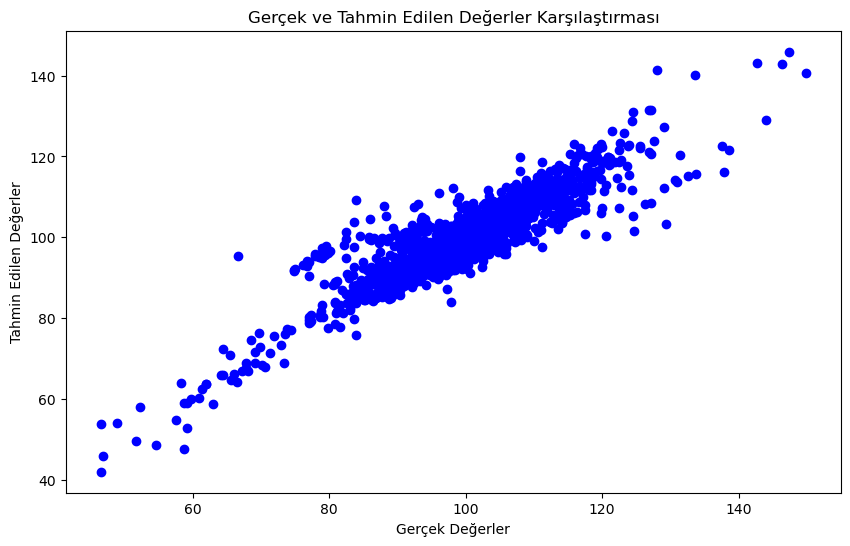

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler Karşılaştırması')
plt.show()

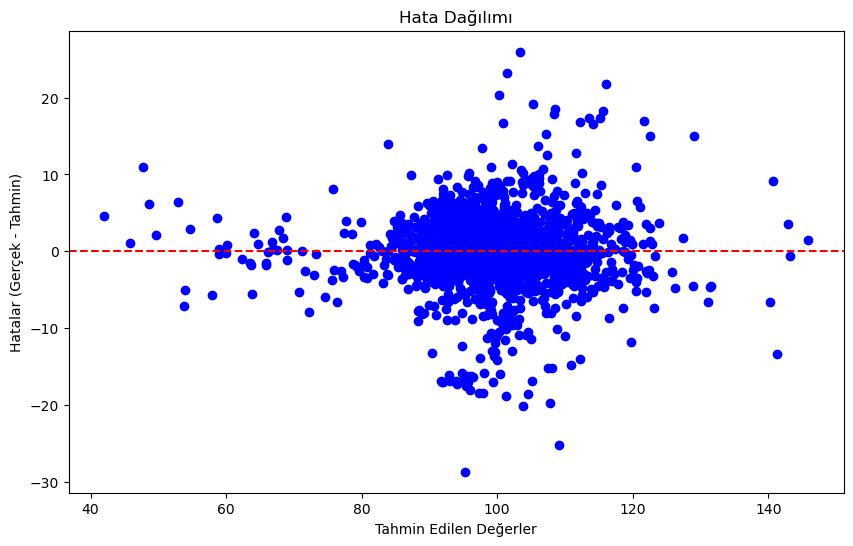

In [33]:
residuals = y - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar (Gerçek - Tahmin)')
plt.title('Hata Dağılımı')
plt.show()

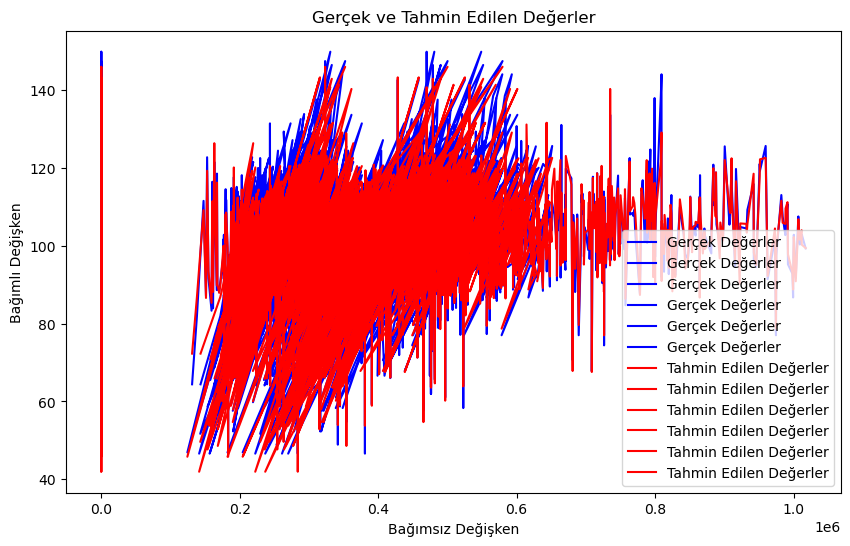

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X, predictions, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('Bağımsız Değişken')
plt.ylabel('Bağımlı Değişken')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [23]:
# Polinom denklemi katsayıları
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

# Denklemi oluşturun
def polynomial_equation(x):
    return np.sum(coefficients * np.power(x, range(degree+1))) + intercept

# Tahmin etmek istediğiniz x değerlerini belirleyin
x_values = np.linspace(min(X), max(X), 100)
predictions = polynomial_equation(x_values)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

ValueError: x and y must be the same size

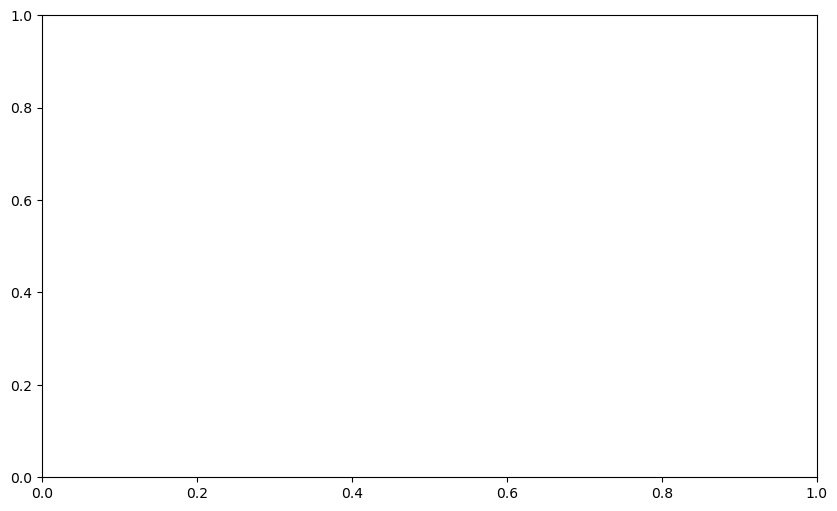

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veri')
plt.plot(x_values, y_predictions, color='red', label='Polinom Tahmin')
plt.xlabel('Bağımsız Değişken')
plt.ylabel('Bağımlı Değişken')
plt.title('Polinom Regresyon Tahminleri ve Polinom Şekli')
plt.legend()
plt.show()